In [128]:
# Load pandas
import pandas

# Load numpy
import numpy as np

# Load Keras/Tensorflow
import keras

# Problem 1

### Prep the data

In [123]:
# Load iris data set
# There is no header.
data1 = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt", delim_whitespace=True, header=None))

In [129]:
# Check the shape of the data set.
X = data1[:,0:4]
X.shape

(150, 4)

In [134]:
# Grab class labels
labels1 = data1[:,4]

In [136]:
# One-hot encoding
Y = keras.utils.to_categorical(labels1, len(np.unique(labels1)))
print(Y.shape)

(150, 3)


### Setup Single-Layer Network

In [280]:
# Setting up a single-layer network
model1 = keras.Sequential()

In [281]:
# Input size - 4
input_size = X.shape[1]

# Input size - 3
output_size = Y.shape[1]

model1.add(keras.layers.Dense(output_size, activation='sigmoid',input_shape=[input_size]))

In [282]:
# Learning rate of 50%
model1.compile(loss=keras.losses.mse, optimizer=keras.optimizers.SGD(lr=0.50), metrics=['accuracy'])

### Train the network

In [283]:
batch_size = 16 # number of patterns experienced between weight updates.
epochs = 500 # number of complete passes through data.
validation_split = 0.5 # 50% of data used for training/ 50% used for generalization test.

# Train the model and record the training
history = model1.fit(X,Y, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 0, # don't print anything
                    validation_split = validation_split)

### Results

In [284]:
score = model1.evaluate(X, Y, verbose=1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 240us/step
Test loss: 0.06874392062425613
Test accuracy: 0.9600000039736429


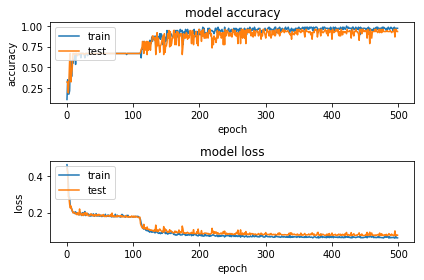

In [285]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(1)

# summarize history for accuracy

plt.subplot(211) 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout() 
plt.show()

# Problem 2

### Prep the data

In [209]:
# Load Wisconsin Breast Cancer data set
# There is no header.
data2 = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt", delim_whitespace=True, header=None))

In [210]:
# check what I'm working with.
print(data2.shape)

(568, 31)


In [211]:
# check what unique values are in the output
np.unique(data2[:,30])

array([0., 1.])

In [98]:
# A is my input data.
A = data2[:,0:30]
A.shape

(568, 30)

In [99]:
# Grab class labels
labels2 = data2[:,30]

In [212]:
# One-hot encoding
B = keras.utils.to_categorical(labels2, len(np.unique(labels2)))

print(B.shape)

(568, 2)


In [213]:
print(labels2[4]) # 0 -> [1 0]
print(B[4,:])
print(labels2[1]) # 1 -> [0 1]
print(B[1,:])

0.0
[1. 0.]
1.0
[0. 1.]


### Setup Single-Layer Network

In [286]:
model2 = keras.Sequential()

In [287]:
# input size - 30
input_size2 = A.shape[1]

# output size - 2
output_size2 = B.shape[1]

model2.add(keras.layers.Dense(output_size2,activation='sigmoid', input_shape=[input_size2]))

In [288]:
model2.summary() # 30 x 2 weight matrix + 2 bias weights from outputs

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [290]:
# Learning rate = 50%
model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.SGD(lr=0.50), metrics=['accuracy'])

### Train the network

In [291]:
batch_size = 16 # number of patterns experienced between weight updates.
epochs = 50 # number of complete passes through data.
validation_split = 0.5 # 50% of data used for training/ 50% used for generalization test.

history = model2.fit(A,B, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 0, 
                    validation_split = validation_split)

### Results

In [296]:
score = model2.evaluate(A, B, verbose=1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

568/568 [==============================] - 0s 223us/step
Test loss: 0.06828275532789634
Test accuracy: 0.9348591540900755


In [295]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(1)

# summarize history for accuracy

plt.subplot(211) 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout() 
plt.show()